In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../../../data/miner/09517617000153_3.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994775 entries, 0 to 994774
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   data                  994775 non-null  object 
 1   produtoId             994775 non-null  int64  
 2   descr                 994328 non-null  object 
 3   valor                 994775 non-null  float64
 4   quantidade            994775 non-null  float64
 5   valorCancelado        994775 non-null  float64
 6   quantidadeCancelada   994775 non-null  float64
 7   quantidadeDocumentos  994775 non-null  int64  
 8   quantidadeValorZero   994775 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 68.3+ MB


In [4]:
data[["data"]] = data[["data"]].apply(pd.to_datetime)
data[["valor"]] = data[["valor"]].apply(pd.to_numeric)
data[["quantidade"]] = data[["quantidade"]].apply(pd.to_numeric)
data[["valorCancelado"]] = data[["valorCancelado"]].apply(pd.to_numeric)
data[["quantidadeCancelada"]] = data[["quantidadeCancelada"]].apply(pd.to_numeric)
data.head()

,data,produtoId,descr,valor,quantidade,valorCancelado,quantidadeCancelada,quantidadeDocumentos,quantidadeValorZero
0,2019-01-02,1001,CREME DENTAL CLOSEUP TRIPLE 70G MENTA,2.79,1.0,0.00,0.0,1,0.0
1,2019-01-02,10012802,MASTRUZ HORTA VERDE UN,19.90,10.0,3.98,2.0,9,0.0
2,2019-01-02,10022,LIXA UNHA M BONI 6 UND,2.59,1.0,0.00,0.0,1,0.0
3,2019-01-02,100328,POLVILHO YOKI 500G AZEDO,9.49,1.0,0.00,0.0,1,0.0
4,2019-01-02,100335,SHAMPOO PROCAO 500ML PELOS CLAROS,7.99,1.0,0.00,0.0,1,0.0


In [5]:
data.tail()

,data,produtoId,descr,valor,quantidade,valorCancelado,quantidadeCancelada,quantidadeDocumentos,quantidadeValorZero
994770,2020-02-18,99745,REFRIGERANTE COCA COLA 1L,29.94,6.0,0.0,0.0,5,0.0
994771,2020-02-18,99851,CERVEJA BRAHMA CHOPP 350ML LATA,4.38,2.0,0.0,0.0,1,0.0
994772,2020-02-18,99868,CERVEJA SKOL 350ML,55.72,28.0,0.0,0.0,6,0.0
994773,2020-02-18,99875,CERVEJA BOHEMIA 350ML LT,1124.35,565.0,0.0,0.0,16,0.0
994774,2020-02-18,9988,FRALDA DESC SAPEKA PRATICO SEG 12,12.99,1.0,0.0,0.0,1,0.0


### Número de variedade de produtos

In [6]:
len(data.produtoId.unique())

16470

In [7]:
len(data.descr.unique())

16376

### Criação de feature de valor unitário diário do produto

In [8]:
data['valorUnitario'] = data['valor']/data['quantidade']

In [9]:
data.head()

,data,produtoId,descr,valor,quantidade,valorCancelado,quantidadeCancelada,quantidadeDocumentos,quantidadeValorZero,valorUnitario
0,2019-01-02,1001,CREME DENTAL CLOSEUP TRIPLE 70G MENTA,2.79,1.0,0.00,0.0,1,0.0,2.79
1,2019-01-02,10012802,MASTRUZ HORTA VERDE UN,19.90,10.0,3.98,2.0,9,0.0,1.99
2,2019-01-02,10022,LIXA UNHA M BONI 6 UND,2.59,1.0,0.00,0.0,1,0.0,2.59
3,2019-01-02,100328,POLVILHO YOKI 500G AZEDO,9.49,1.0,0.00,0.0,1,0.0,9.49
4,2019-01-02,100335,SHAMPOO PROCAO 500ML PELOS CLAROS,7.99,1.0,0.00,0.0,1,0.0,7.99


### Criação defeature valor vendido real (retirando o valor cancelado)

In [10]:
data['valorReal'] =  data['valor'] - data['valorCancelado']

In [11]:
data.head()

,data,produtoId,descr,valor,quantidade,valorCancelado,quantidadeCancelada,quantidadeDocumentos,quantidadeValorZero,valorUnitario,valorReal
0,2019-01-02,1001,CREME DENTAL CLOSEUP TRIPLE 70G MENTA,2.79,1.0,0.00,0.0,1,0.0,2.79,2.79
1,2019-01-02,10012802,MASTRUZ HORTA VERDE UN,19.90,10.0,3.98,2.0,9,0.0,1.99,15.92
2,2019-01-02,10022,LIXA UNHA M BONI 6 UND,2.59,1.0,0.00,0.0,1,0.0,2.59,2.59
3,2019-01-02,100328,POLVILHO YOKI 500G AZEDO,9.49,1.0,0.00,0.0,1,0.0,9.49,9.49
4,2019-01-02,100335,SHAMPOO PROCAO 500ML PELOS CLAROS,7.99,1.0,0.00,0.0,1,0.0,7.99,7.99


### Faturamento 02/01/2019 - 06/03/2020 Assinante 09517617000153 loja 3

In [12]:
round(data['valorReal'].sum(), 2)

26892041.74

## Análise temporal

In [13]:
data['data'] = data['data'].astype('datetime64[ns]')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994775 entries, 0 to 994774
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   data                  994775 non-null  datetime64[ns]
 1   produtoId             994775 non-null  int64         
 2   descr                 994328 non-null  object        
 3   valor                 994775 non-null  float64       
 4   quantidade            994775 non-null  float64       
 5   valorCancelado        994775 non-null  float64       
 6   quantidadeCancelada   994775 non-null  float64       
 7   quantidadeDocumentos  994775 non-null  int64         
 8   quantidadeValorZero   994775 non-null  float64       
 9   valorUnitario         988283 non-null  float64       
 10  valorReal             994775 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 83.5+ MB


### Valor semanal acumulado

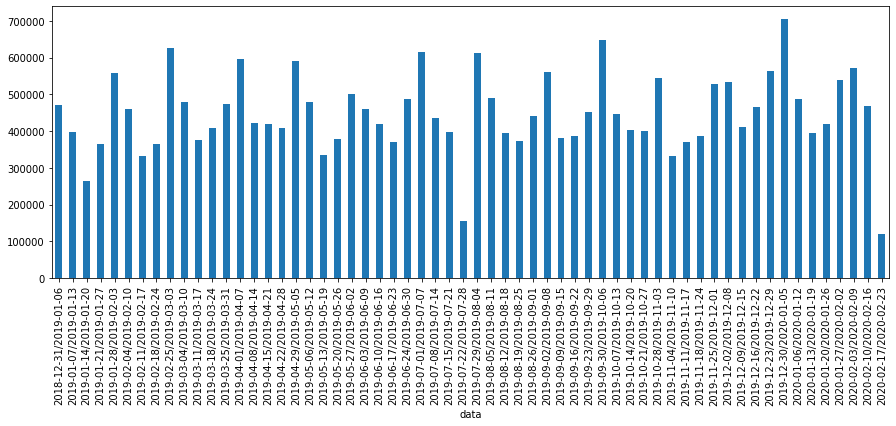

In [14]:
data['valorReal'].groupby(data['data'].dt.to_period('W')).sum().plot(kind='bar', figsize=(15,5))

### Valor mensal acumulado

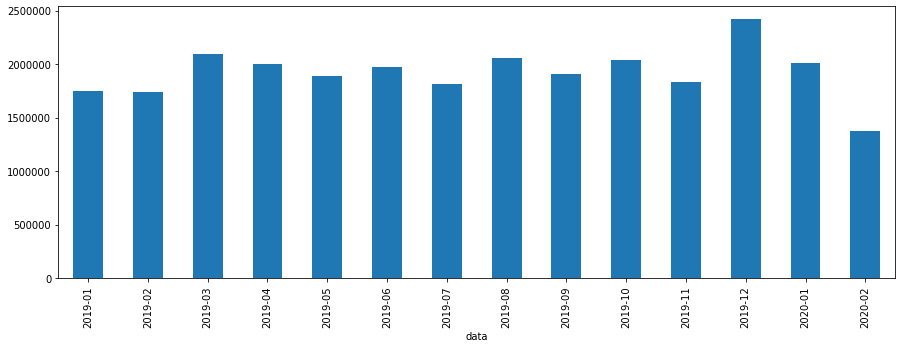

In [15]:
data['valorReal'].groupby(data['data'].dt.to_period('M')).sum().plot(kind='bar', figsize=(15,5))

In [16]:
data["Year"] = data.data.apply(lambda x: x.year)
data["Month"] = data.data.apply(lambda x: x.strftime("%B"))
df = data.pivot_table(index="Month",columns="Year",values="valorReal", aggfunc="sum").fillna(0)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
pt = df.reindex(months)
pt.head(14)

Year,2019,2020
Month,,
January,1.750748e+06,2.009528e+06
February,1.734923e+06,1.371184e+06
March,2.093309e+06,0.000000e+00
April,2.004347e+06,0.000000e+00
May,1.891051e+06,0.000000e+00
June,1.976362e+06,0.000000e+00
July,1.811104e+06,0.000000e+00
August,2.057703e+06,0.000000e+00
September,1.903116e+06,0.000000e+00


### Valor arrecadado por mês detalhado

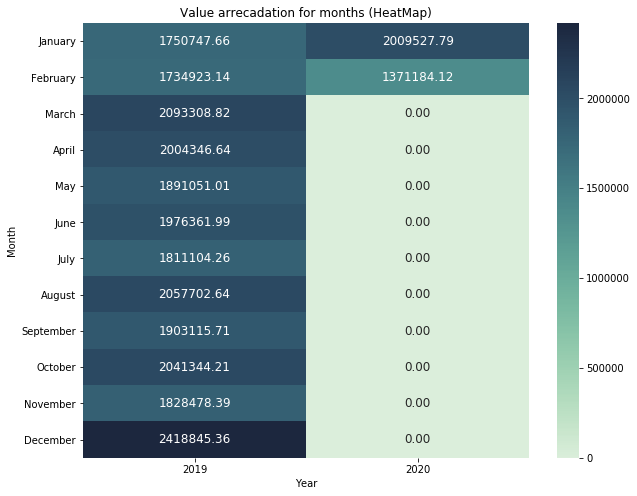

In [17]:
fig= plt.figure(figsize=(10,8), )
ax = plt.axes()
ax.set_title('Value arrecadation for months (HeatMap)')

cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True, light=.9)
cmap.set_under(".5")
sns.heatmap(pt, ax = ax, cmap=cmap, fmt='.2f', mask=pt.isnull(), annot=True, annot_kws={'size':12})

In [18]:
def plot_history_quantity_prod(descr_prod):
    
    df_prod = data[data['descr'] == descr_prod]
    
    title = "Histórico de quantidade semanal de vendas produto :{}".format(str(descr_prod))
    
    ax = df_prod['quantidade'].groupby(df_prod['data'].dt.to_period('W')).sum().plot(
    label = 'Quantidade vendida',figsize=(20,7), 
    color = "royalblue", legend = True, title = title)
    # marker = "8", markersize =2 
    
    ax.set_xlabel('Tempo em Semanas')
    ax.set_ylabel('Quantidade acumulada')
    ax.grid()
    
def plot_history_true_value_prod(descr_prod):
    
    df_prod = data[data['descr'] == descr_prod]
    
    title = "Histórico de quantidade semanal de vendas produto :{}".format(str(descr_prod))
    
    ax = df_prod['valorReal'].groupby(df_prod['data'].dt.to_period('W')).sum().plot(
    label = 'Valor realizado',figsize=(20,7), 
    color = "royalblue", legend = True, title = title)
    # marker = "8", markersize =2 
    
    ax.set_xlabel('Tempo em Semanas')
    ax.set_ylabel('Valor acumulado')
    ax.grid()

# Acumulado por produto (quantidade e valor real)

### Dataframe por descrição de produtos


In [19]:
data

,data,produtoId,descr,valor,quantidade,valorCancelado,quantidadeCancelada,quantidadeDocumentos,quantidadeValorZero,valorUnitario,valorReal,Year,Month
0,2019-01-02,1001,CREME DENTAL CLOSEUP TRIPLE 70G MENTA,2.79,1.0,0.00,0.0,1,0.0,2.79,2.79,2019,January
1,2019-01-02,10012802,MASTRUZ HORTA VERDE UN,19.90,10.0,3.98,2.0,9,0.0,1.99,15.92,2019,January
2,2019-01-02,10022,LIXA UNHA M BONI 6 UND,2.59,1.0,0.00,0.0,1,0.0,2.59,2.59,2019,January
3,2019-01-02,100328,POLVILHO YOKI 500G AZEDO,9.49,1.0,0.00,0.0,1,0.0,9.49,9.49,2019,January
4,2019-01-02,100335,SHAMPOO PROCAO 500ML PELOS CLAROS,7.99,1.0,0.00,0.0,1,0.0,7.99,7.99,2019,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994770,2020-02-18,99745,REFRIGERANTE COCA COLA 1L,29.94,6.0,0.00,0.0,5,0.0,4.99,29.94,2020,February
994771,2020-02-18,99851,CERVEJA BRAHMA CHOPP 350ML LATA,4.38,2.0,0.00,0.0,1,0.0,2.19,4.38,2020,February
994772,2020-02-18,99868,CERVEJA SKOL 350ML,55.72,28.0,0.00,0.0,6,0.0,1.99,55.72,2020,February
994773,2020-02-18,99875,CERVEJA BOHEMIA 350ML LT,1124.35,565.0,0.00,0.0,16,0.0,1.99,1124.35,2020,February


In [20]:
dataMostSell = data.groupby(['descr', 'produtoId'])['valorReal', 'quantidade'].sum()

/home/personal-arthur/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


### Número de produtos com descrições diferentes

In [21]:
len(dataMostSell)

16440

In [22]:
dataMostSell.head()

,,valorReal,quantidade
descr,produtoId,,
ABS DEFINITY CLASSIC REG SEM ABA C 10 UNIDADES,16651,383.60,160.0
BATON BARRA GAROTO 96G AO LEITE,7117,670.04,99.0
BATON BARRA GAROTO 96G CREME,7111,240.42,42.0
BATON BARRA GAROTO 96G RECHADO CHOC BRANCO,7120,726.74,107.0
CANECA PORC DROP 21757 250ML,17216,167.79,21.0


### Criando valor médio do produto durante o periodo analisado

In [23]:
dataMostSell['valorMedio'] = round(dataMostSell['valorReal']/dataMostSell['quantidade'], 2)

### Recriando a colunas descrição, produtoId e ajustando index numeral 

In [24]:
dataMostSell['descr'] = dataMostSell.index.get_level_values(0)
dataMostSell['produtoId'] = dataMostSell.index.get_level_values(1)
dataMostSell.index = range(0, len(dataMostSell))

In [25]:
dataMostSell = dataMostSell[['descr', 'produtoId', 'valorReal','quantidade','valorMedio']]

In [26]:
dataMostSell.head()

,descr,produtoId,valorReal,quantidade,valorMedio
0,ABS DEFINITY CLASSIC REG SEM ABA C 10 UNIDADES,16651,383.60,160.0,2.40
1,BATON BARRA GAROTO 96G AO LEITE,7117,670.04,99.0,6.77
2,BATON BARRA GAROTO 96G CREME,7111,240.42,42.0,5.72
3,BATON BARRA GAROTO 96G RECHADO CHOC BRANCO,7120,726.74,107.0,6.79
4,CANECA PORC DROP 21757 250ML,17216,167.79,21.0,7.99


### Ordenando o dataframe pela quantidade acumulada de venda do produto 

In [27]:
dataMostSellByQuantity = dataMostSell.sort_values(by=['quantidade'] ,ascending=False)

In [28]:
dataMostSellByQuantity.head()

,descr,produtoId,valorReal,quantidade,valorMedio
3072,CERVEJA DEVASSA LOURA 350ML LT,128568,188802.54,92221.0,2.05
990,ARROZ PARCERIA 1KG BRANCO,138352,174780.72,75637.0,2.31
8942,LEITE UHT LIRIO 1L INTEGRAL,66846,200523.95,71856.0,2.79
967,ARROZ BEM CASEIRO 1KG BRANCO,149402,159056.80,71210.0,2.23
9363,MACARRAO BONSABOR 500G ESPAGUETE,139533,102811.63,66470.0,1.55


### Top 10 produtos (by Quantity)

In [29]:
top10prodByQuantity = dataMostSellByQuantity[:10]['descr'].values
top10prodByQuantity

array(['CERVEJA DEVASSA LOURA 350ML LT', 'ARROZ PARCERIA 1KG BRANCO',
       'LEITE UHT LIRIO 1L INTEGRAL', 'ARROZ BEM CASEIRO 1KG BRANCO',
       'MACARRAO BONSABOR 500G ESPAGUETE',
       'LEITE UHT JAGUARIBE 1L INTEGRAL', 'BEBIDA LACTEA NESCAU 200ML',
       'HAMBURGUER MISTO PERDIGAO 56G', 'COENTRO HORTA VERDE UN',
       'ARROZ PARCERIA 1KG PARBO'], dtype=object)

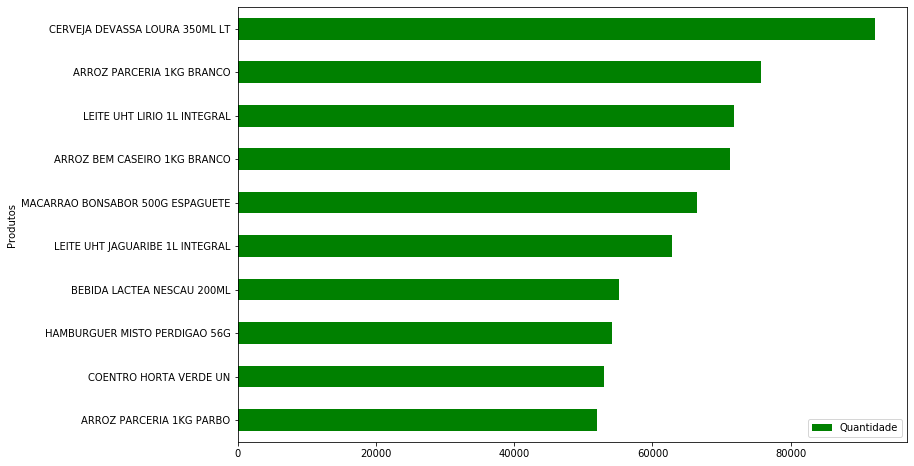

In [30]:
df = pd.DataFrame({'Quantidade': dataMostSellByQuantity['quantidade'][:10].values}, 
                  index=dataMostSellByQuantity['descr'][:10])
df.sort_values('Quantidade',inplace=True)
df.index.name = 'Produtos'
ax = df.plot.barh(rot=0, figsize=(12,8),color='g')

## Quantidade semanal vendido por protudo

### Top 1 quantidade vendida

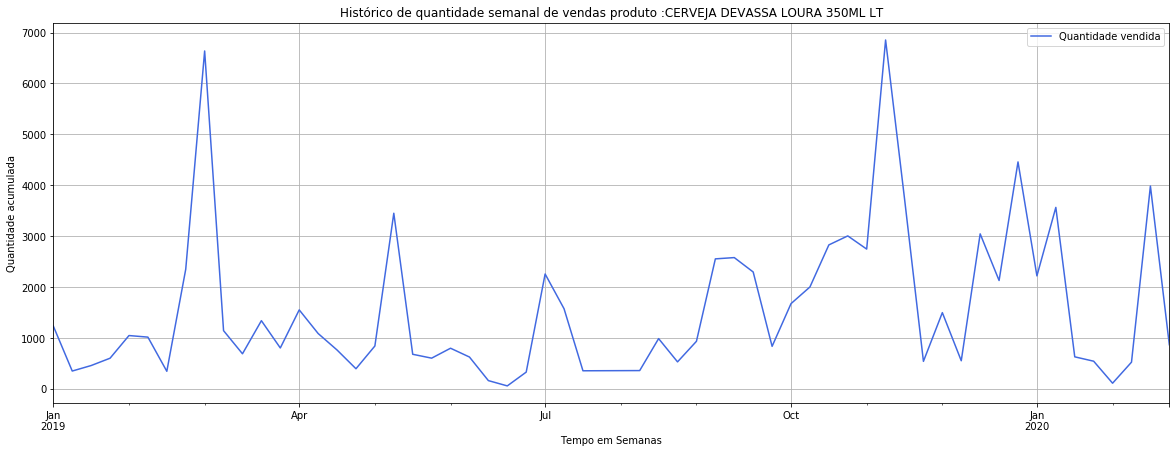

In [31]:
plot_history_quantity_prod(str(top10prodByQuantity[0]))

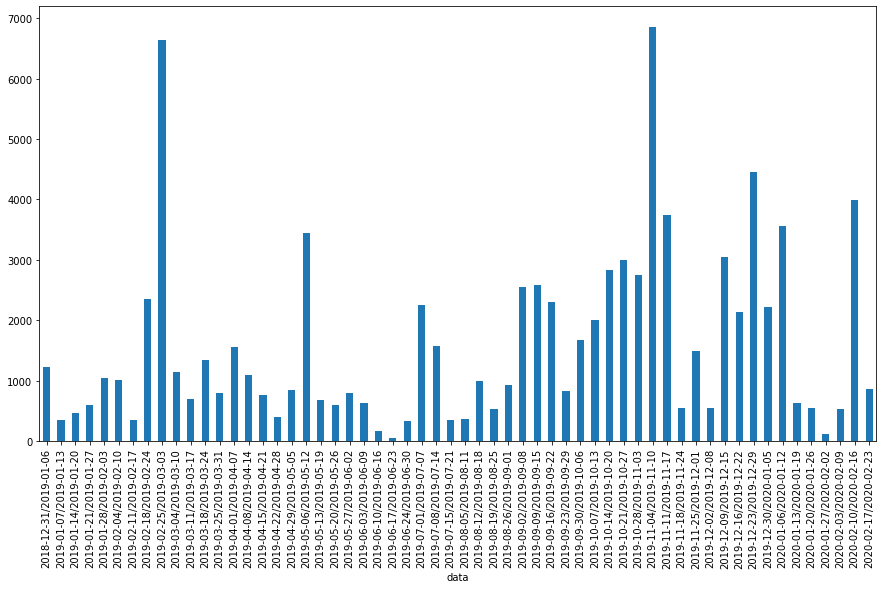

In [32]:
data_prod = data[data['descr'] == str(top10prodByQuantity[0])]
data_prod['quantidade'].groupby(data_prod['data'].dt.to_period('W')).sum().plot(kind='bar', figsize=(15,8))

### Top 2 quantidade vendida

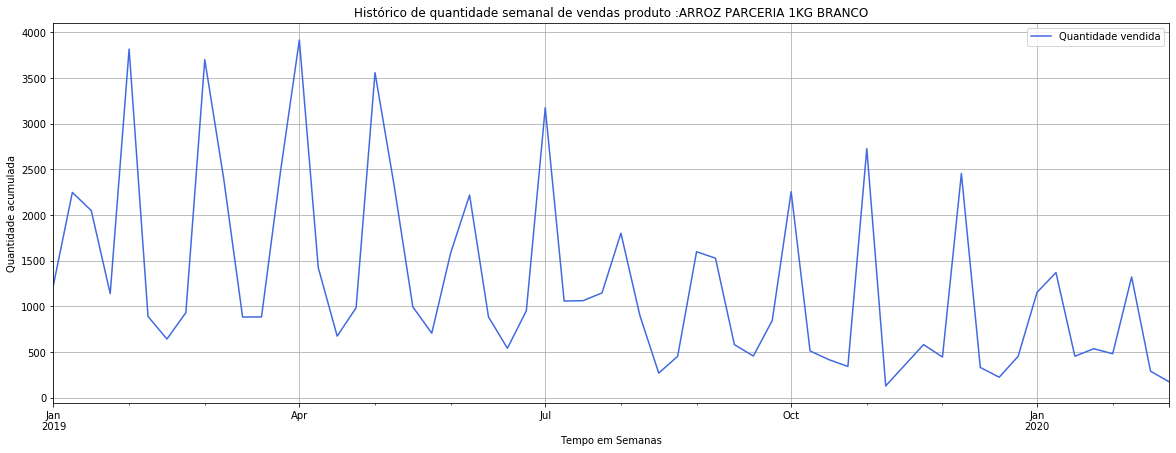

In [33]:
plot_history_quantity_prod(str(top10prodByQuantity[1]))

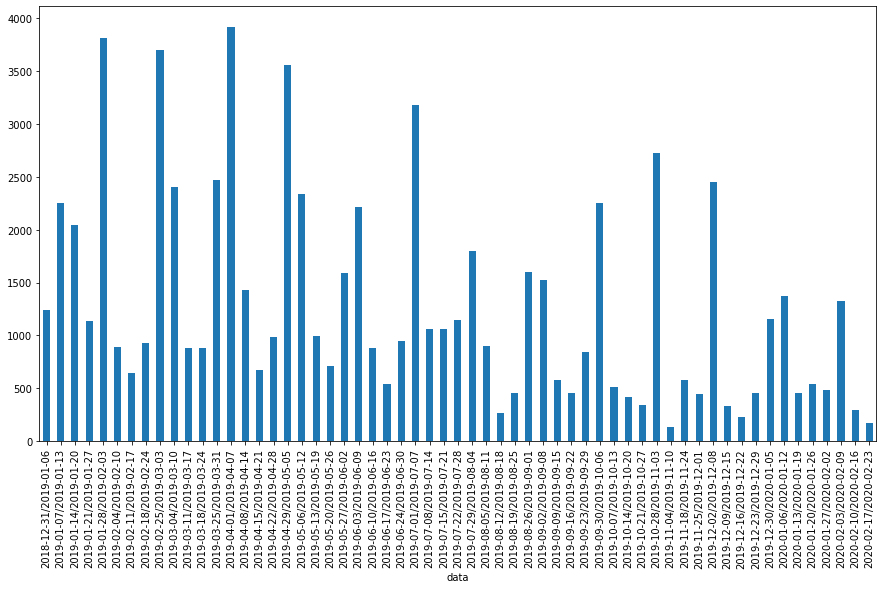

In [34]:
data_prod = data[data['descr'] == str(top10prodByQuantity[1])]
data_prod['quantidade'].groupby(data_prod['data'].dt.to_period('W')).sum().plot(kind='bar', figsize=(15,8))

### Top 3 quantidade vendida

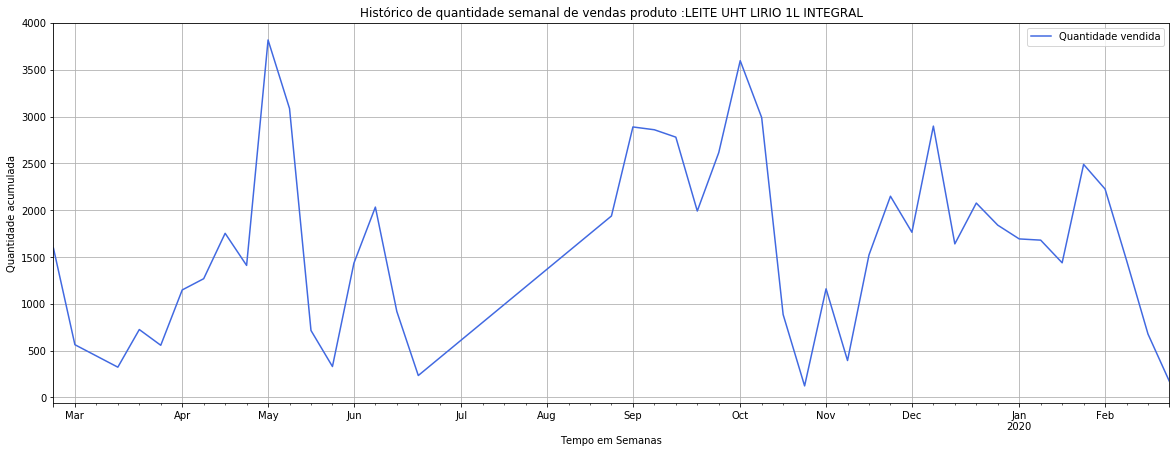

In [35]:
plot_history_quantity_prod(str(top10prodByQuantity[2]))

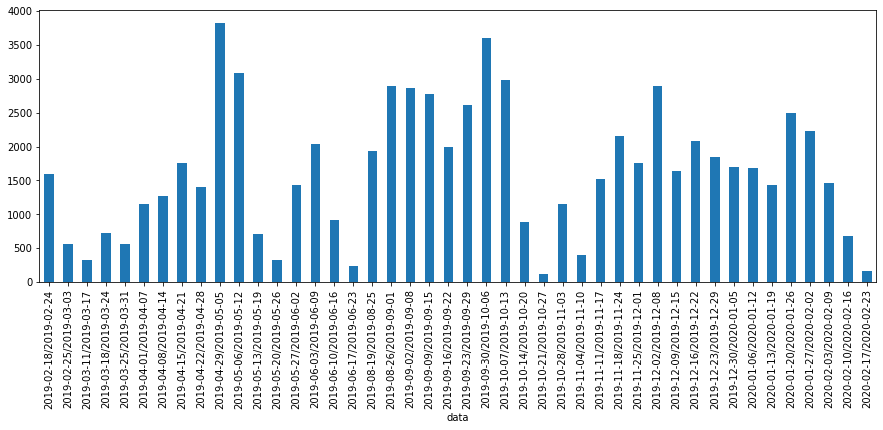

In [36]:
data_prod = data[data['descr'] == str(top10prodByQuantity[2])]
data_prod['quantidade'].groupby(data_prod['data'].dt.to_period('W')).sum().plot(kind='bar', figsize=(15,5))

### Ordenando o dataframe pelo valor real acumulado de venda do produto

In [37]:
dataMostSellByTrueValue = dataMostSell.sort_values(by=['valorReal'] ,ascending=False)

In [38]:
dataMostSellByTrueValue.head()

,descr,produtoId,valorReal,quantidade,valorMedio
2815,CARNE MOIDA DE 1° KG,93385,447487.45,22654.756,19.75
9274,LOMBO BOV C OSSO KG,43878,399145.35,27849.969,14.33
8907,LEITE PO NINHO 800G INTEGRAL SC,152051,336760.10,18478.000,18.22
11262,PATINHO BOV RESF FRIBAL KG,212830,320204.62,13950.676,22.95
8881,LEITE PO ITAMBE INTEGRAL 1KG SC,112468,308879.23,17176.000,17.98


### Top 10 produtos valor acumulado

In [39]:
top10prodByTrueValue = dataMostSellByTrueValue[:10]['descr'].values
top10prodByTrueValue

array(['CARNE MOIDA DE 1°  KG', 'LOMBO BOV C OSSO KG',
       'LEITE PO NINHO 800G INTEGRAL SC', 'PATINHO BOV RESF FRIBAL KG',
       'LEITE PO ITAMBE INTEGRAL 1KG SC', 'CUPIM BOV FRIBOI B KG',
       'LEITE UHT LIRIO 1L INTEGRAL', 'CERVEJA DEVASSA LOURA 350ML LT',
       'COSTELA DE P A KG', 'FILE PEITO FRANGO PERDIGAO 1KG BD'],
      dtype=object)

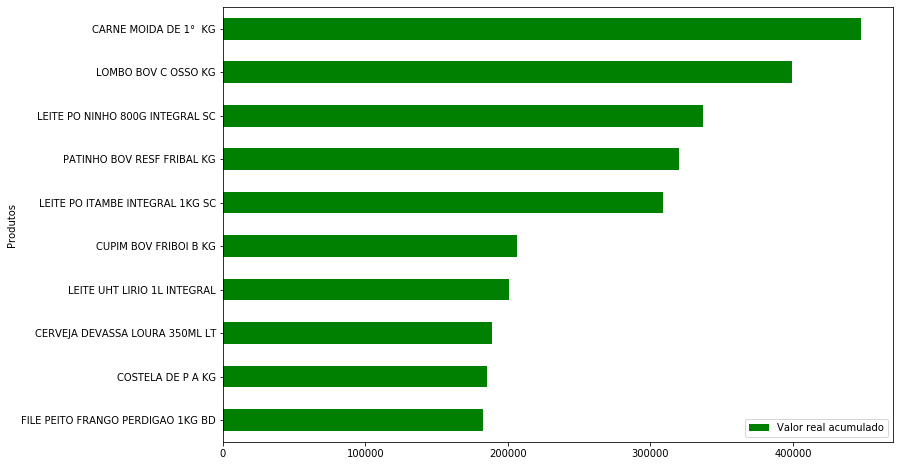

In [40]:
df = pd.DataFrame({'Valor real acumulado': dataMostSellByTrueValue['valorReal'][:10].values}, 
                  index=dataMostSellByTrueValue['descr'][:10])
df.sort_values('Valor real acumulado',inplace=True)
df.index.name = 'Produtos'
ax = df.plot.barh(rot=0, figsize=(12,8) ,color='g')

### Top 1 valor real 

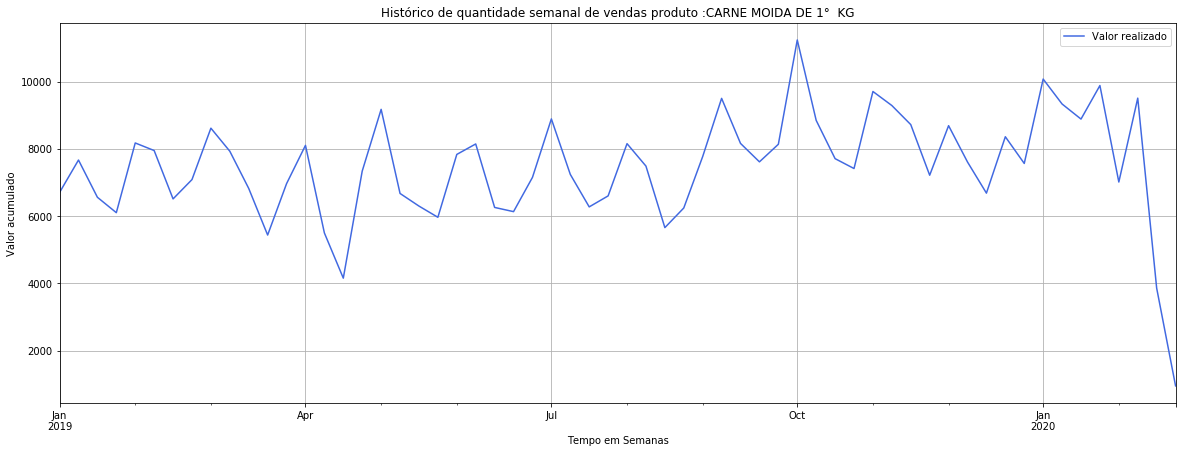

In [41]:
plot_history_true_value_prod(str(top10prodByTrueValue[0]))

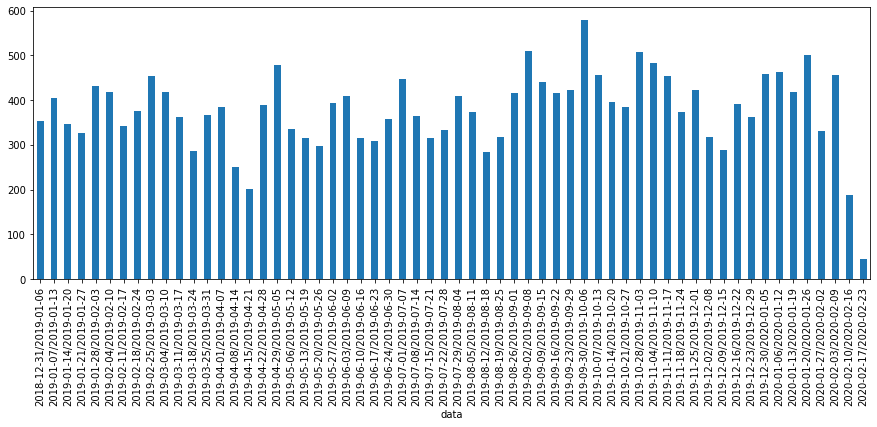

In [42]:
data_prod = data[data['descr'] == str(top10prodByTrueValue[0])]
data_prod['quantidade'].groupby(data_prod['data'].dt.to_period('W')).sum().plot(kind='bar', figsize=(15,5))

### Top 2 valor real 

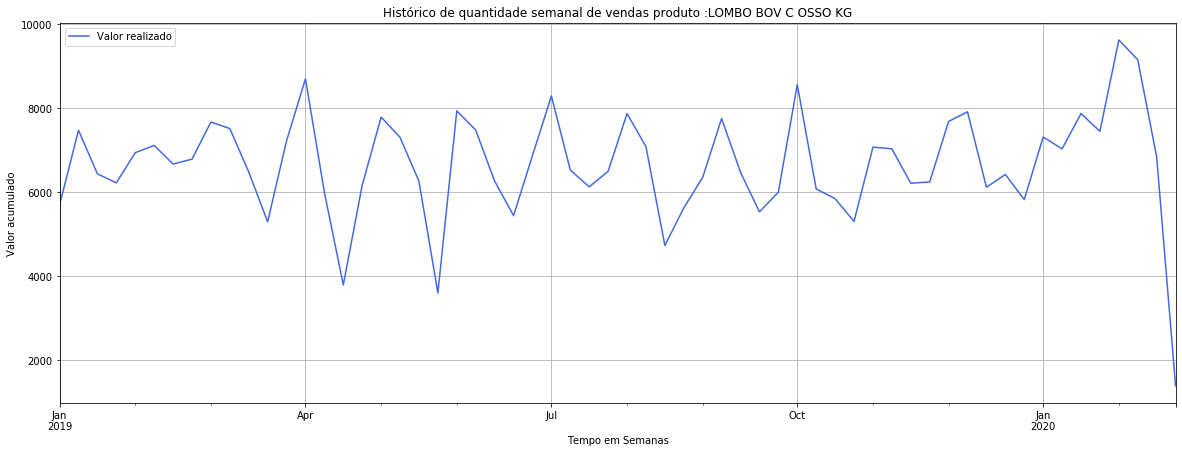

In [43]:
plot_history_true_value_prod(str(top10prodByTrueValue[1]))

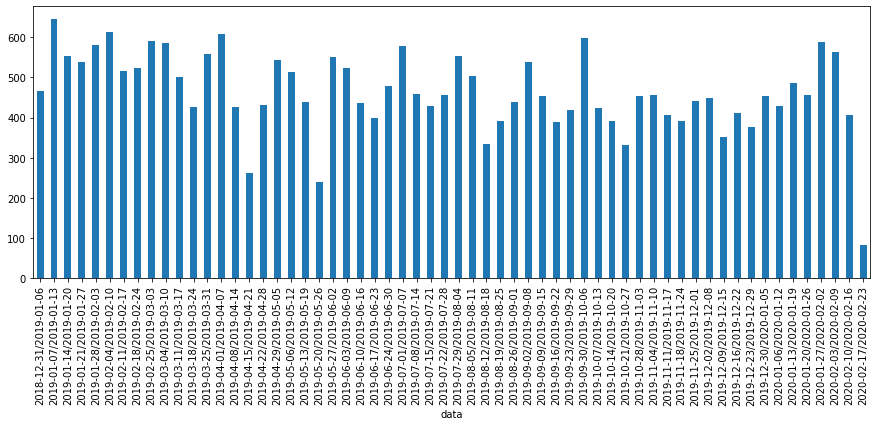

In [44]:
data_prod = data[data['descr'] == str(top10prodByTrueValue[1])]
data_prod['quantidade'].groupby(data_prod['data'].dt.to_period('W')).sum().plot(kind='bar', figsize=(15,5))

### Top 3 valor real 

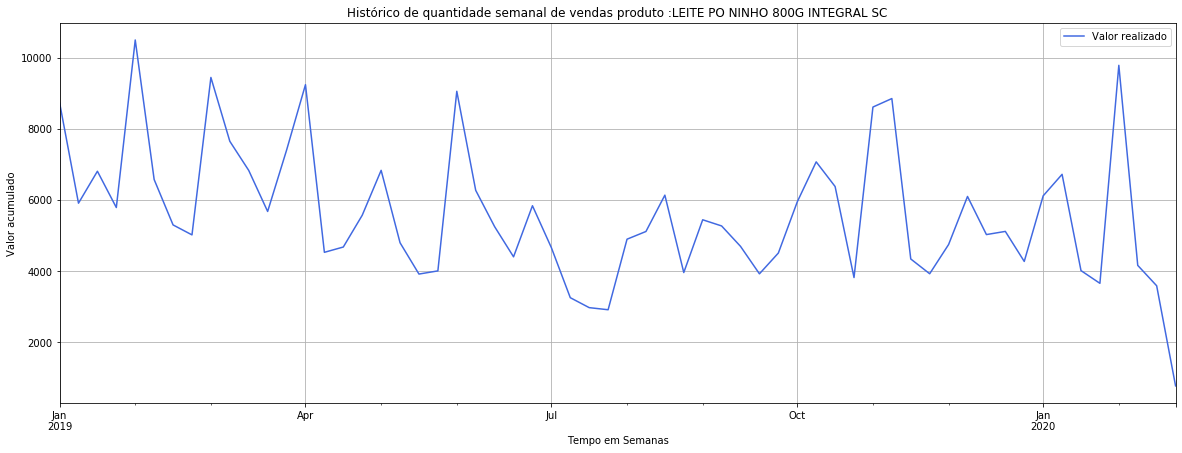

In [45]:
plot_history_true_value_prod(str(top10prodByTrueValue[2]))

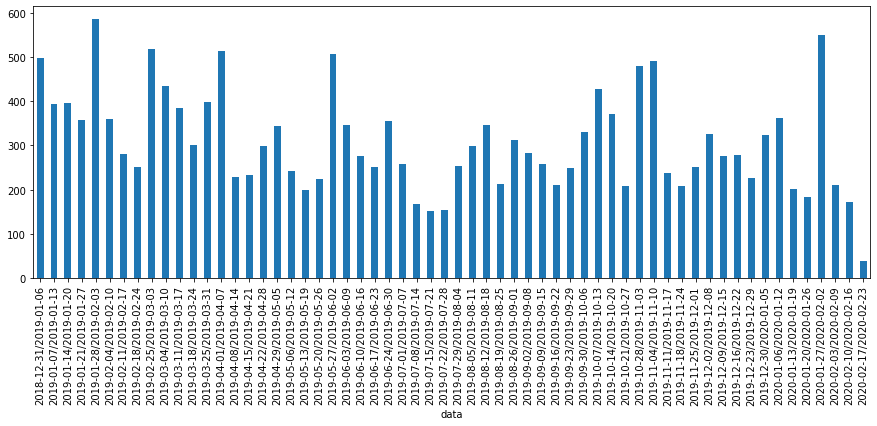

In [46]:
data_prod = data[data['descr'] == str(top10prodByTrueValue[2])]
data_prod['quantidade'].groupby(data_prod['data'].dt.to_period('W')).sum().plot(kind='bar', figsize=(15,5))

### Aplicando sensibilidade de datas

In [47]:
from importlib import reload
import product_sensibility_date as ds
reload(ds)

<module 'product_sensibility_date' from '/home/personal-arthur/Documentos/Dev.Academy/andromeda/src/quixada/exploration_data/product_sensibility_date.py'>

In [48]:
len(data)

994775

In [49]:
ids_qtd = []
data_sense_qtd = []
ids_tv = []
data_sense_tv = []

for i in range(0, len(top10prodByQuantity)):
    prodID = int(list(data.loc[(data['descr']) == str(top10prodByQuantity[i])]['produtoId'])[0])    
    ids_qtd.append(prodID)
    prod_sense = ds.is_var_holliday('09517617000153', '3', prodID)
    data_sense_qtd.append(prod_sense)
    
for i in range(0, len(top10prodByTrueValue)):
    prodID = int(list(data.loc[(data['descr']) == str(top10prodByTrueValue[i])]['produtoId'])[0])    
    ids_tv.append(prodID)
    prod_sense = ds.is_var_holliday('09517617000153', '3', prodID)
    data_sense_tv.append(prod_sense)

In [50]:
ids_qtd, ids_tv

([128568, 138352, 66846, 149402, 139533, 40594, 59909, 60820, 7245, 138307],
 [93385, 43878, 152051, 212830, 112468, 3544, 66846, 128568, 3391, 154468])

In [51]:
data_sense_qtd = pd.concat(data_sense_qtd)
data_sense_tv = pd.concat(data_sense_tv)

In [52]:
data_sense_qtd.head()

,data,produtoId,descr,valor,quantidade,valorCancelado,quantidadeCancelada,quantidadeDocumentos,quantidadeValorZero,sense_Carnaval,sense_SemanaSanta,sense_Natal,sense_AnoNovo
data,,,,,,,,,,,,,
2019-01-02,2019-01-02,128568,CERVEJA DEVASSA LOURA 350ML LT,172.08,72.0,21.51,9.0,2,0.0,1,0,1,1
2019-01-03,2019-01-03,128568,CERVEJA DEVASSA LOURA 350ML LT,31.07,13.0,0.00,0.0,1,0.0,1,0,1,1
2019-01-04,2019-01-04,128568,CERVEJA DEVASSA LOURA 350ML LT,411.08,172.0,0.00,0.0,11,0.0,1,0,1,1
2019-01-05,2019-01-05,128568,CERVEJA DEVASSA LOURA 350ML LT,1978.92,828.0,260.51,109.0,19,0.0,1,0,1,1
2019-01-06,2019-01-06,128568,CERVEJA DEVASSA LOURA 350ML LT,358.50,150.0,0.00,0.0,10,0.0,1,0,1,1


In [53]:
data_sense_tv.head()

,data,produtoId,descr,valor,quantidade,valorCancelado,quantidadeCancelada,quantidadeDocumentos,quantidadeValorZero,sense_Carnaval,sense_SemanaSanta,sense_Natal,sense_AnoNovo
data,,,,,,,,,,,,,
2019-01-02,2019-01-02,93385,CARNE MOIDA DE 1° KG,1844.36,97.138,7.21,0.38,124,0.0,0,0,1,1
2019-01-03,2019-01-03,93385,CARNE MOIDA DE 1° KG,1705.07,89.796,0.00,0.00,116,0.0,0,0,1,1
2019-01-04,2019-01-04,93385,CARNE MOIDA DE 1° KG,1252.09,65.944,0.00,0.00,87,0.0,0,0,1,1
2019-01-05,2019-01-05,93385,CARNE MOIDA DE 1° KG,899.12,47.356,0.00,0.00,68,0.0,0,0,1,1
2019-01-06,2019-01-06,93385,CARNE MOIDA DE 1° KG,1009.20,53.150,0.00,0.00,79,0.0,0,0,1,1


### Dataframes com sensibilidade dos produtos top 10 quantidade acumulada

In [54]:
sense_carna = data_sense_qtd[data_sense_qtd['sense_Carnaval'] == 1]
sense_SemanaSanta = data_sense_qtd[data_sense_qtd['sense_SemanaSanta'] == 1]
sense_Natal = data_sense_qtd[data_sense_qtd['sense_Natal'] == 1]
sense_AnoNovo = data_sense_qtd[data_sense_qtd['sense_AnoNovo'] == 1]

#### Produtos do top 10 quantidades sensíveis ao carnaval

In [55]:
print(list(sense_carna['descr'].unique()),'\nQuantidade:', len(sense_carna['descr'].unique()))

['CERVEJA DEVASSA LOURA 350ML LT', 'ARROZ PARCERIA 1KG BRANCO', 'MACARRAO BONSABOR 500G ESPAGUETE', 'LEITE UHT JAGUARIBE 1L INTEGRAL', 'BEBIDA LACTEA NESCAU 200ML', 'HAMBURGUER MISTO PERDIGAO 56G', 'ARROZ PARCERIA 1KG PARBO'] 
Quantidade: 7


#### Produtos do top 10 quantidades sensíveis a semana Santa

In [56]:
print(list(sense_SemanaSanta['descr'].unique()),'\nQuantidade:', len(sense_SemanaSanta['descr'].unique()))

['ARROZ BEM CASEIRO 1KG BRANCO', 'COENTRO HORTA VERDE UN'] 
Quantidade: 2


#### Produtos do top 10 quantidades sensíveis ao Natal

In [57]:
print(list(sense_Natal['descr'].unique()),'\nQuantidade:', len(sense_Natal['descr'].unique()))

['CERVEJA DEVASSA LOURA 350ML LT', 'LEITE UHT LIRIO 1L INTEGRAL', 'ARROZ BEM CASEIRO 1KG BRANCO', 'COENTRO HORTA VERDE UN'] 
Quantidade: 4


#### Produtos do top 10 quantidades sensíveis ao Ano Novo

In [58]:
print(list(sense_AnoNovo['descr'].unique()),'\nQuantidade:', len(sense_AnoNovo['descr'].unique()))

['CERVEJA DEVASSA LOURA 350ML LT', 'LEITE UHT LIRIO 1L INTEGRAL', 'COENTRO HORTA VERDE UN'] 
Quantidade: 3


### Dataframes com sensibilidade dos produtos top 10 valor real acumulado

In [59]:
sense_carna = data_sense_tv[data_sense_tv['sense_Carnaval'] == 1]
sense_SemanaSanta = data_sense_tv[data_sense_tv['sense_SemanaSanta'] == 1]
sense_Natal = data_sense_tv[data_sense_tv['sense_Natal'] == 1]
sense_AnoNovo = data_sense_tv[data_sense_tv['sense_AnoNovo'] == 1]

#### Produtos do top 10 valor real acumulado sensíveis ao carnaval

In [60]:
print(list(sense_carna['descr'].unique()),'\nQuantidade:', len(sense_carna['descr'].unique()))

['LEITE PO NINHO 800G INTEGRAL SC', 'PATINHO BOV RESF FRIBAL KG', 'CUPIM BOV FRIBOI B KG', 'CERVEJA DEVASSA LOURA 350ML LT', 'FILE PEITO FRANGO PERDIGAO 1KG BD'] 
Quantidade: 5


#### Produtos do top 10 valor real acumulado sensíveis a semana Santa

In [61]:
print(list(sense_SemanaSanta['descr'].unique()),'\nQuantidade:', len(sense_SemanaSanta['descr'].unique()))

[] 
Quantidade: 0


#### Produtos do top 10 valor real acumulado sensíveis ao Natal

In [62]:
print(list(sense_Natal['descr'].unique()),'\nQuantidade:', len(sense_Natal['descr'].unique()))

['CARNE MOIDA DE 1°  KG', 'CUPIM BOV FRIBOI B KG', 'LEITE UHT LIRIO 1L INTEGRAL', 'CERVEJA DEVASSA LOURA 350ML LT'] 
Quantidade: 4


#### Produtos do top 10 valor real acumulado sensíveis ao Ano novo

In [63]:
print(list(sense_AnoNovo['descr'].unique()),'\nQuantidade:', len(sense_AnoNovo['descr'].unique()))

['CARNE MOIDA DE 1°  KG', 'CUPIM BOV FRIBOI B KG', 'LEITE UHT LIRIO 1L INTEGRAL', 'CERVEJA DEVASSA LOURA 350ML LT'] 
Quantidade: 4


## Analise por dia da semana

In [64]:
def miner_dataset_date_dayweek(dataset, id_prod, dayweek = 0):
    data_prod = data[data['produtoId'] == id_prod]
    
    data_prod['dia_semana']  =  pd.DatetimeIndex(data_prod['data']).dayofweek
    
    data_prod = data_prod[data_prod['dia_semana'] == dayweek]
    
    data_prod['valorReal'] =  data_prod['valor'] - data_prod['valorCancelado']
    
    columns = ['valorCancelado', 'quantidadeCancelada', 'quantidadeDocumentos', 'quantidadeValorZero']
    data_prod.drop(columns, inplace=True, axis=1)
    
    return data_prod

In [65]:
id_prod = 138352

### Analise da Segunda-Feira

In [66]:
df_seg = miner_dataset_date_dayweek(dataset=data, id_prod=id_prod, dayweek=0)

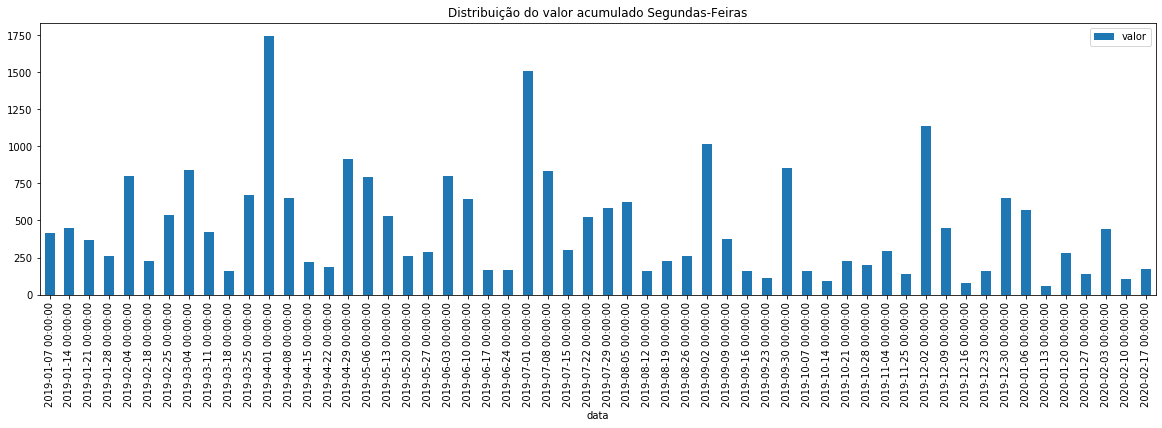

In [67]:
df_seg.plot(kind='bar', x='data', y='valor', title='Distribuição do valor acumulado Segundas-Feiras', figsize=(20,5))

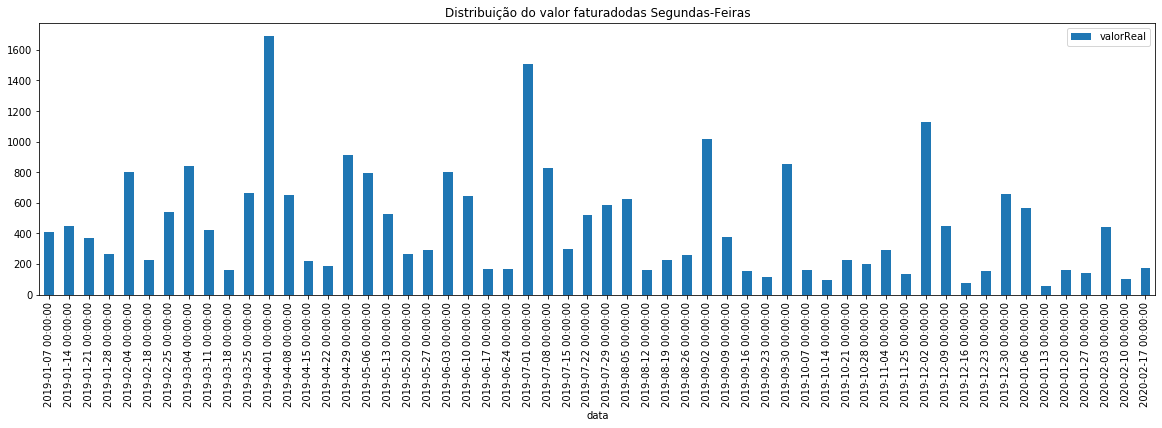

In [68]:
df_seg.plot(kind='bar', x='data', y='valorReal', title='Distribuição do valor faturadodas Segundas-Feiras', figsize=(20,5))

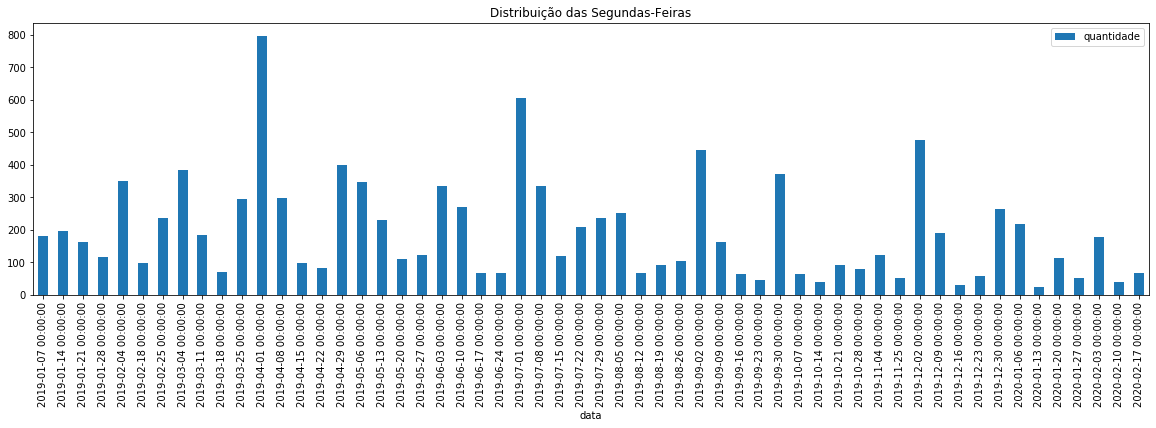

In [69]:
df_seg.plot(kind='bar', x='data', y='quantidade', title='Distribuição das Segundas-Feiras', figsize=(20,5))

### Analise da Terça-Feira

In [70]:
df_ter = miner_dataset_date_dayweek(dataset=data, id_prod=id_prod, dayweek=1)

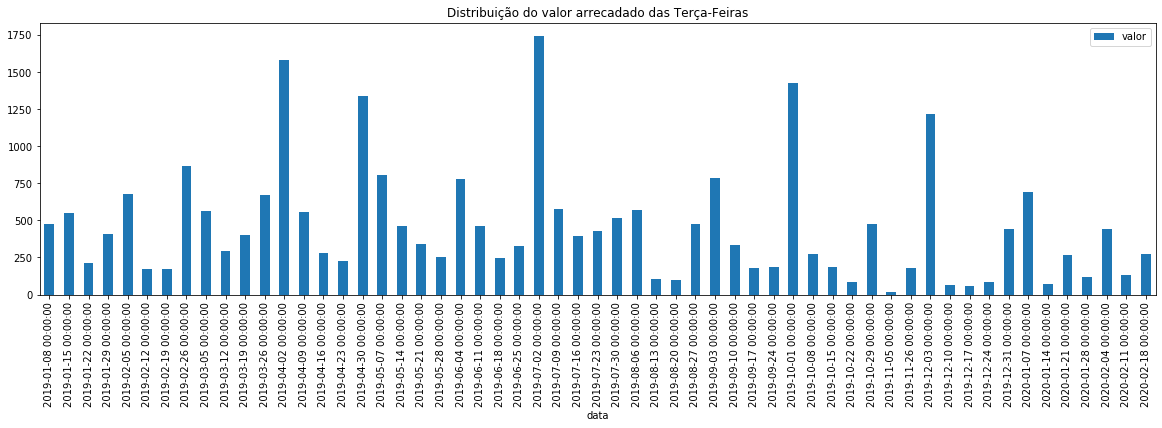

In [71]:
df_ter.plot(kind='bar', x='data', y='valor', title='Distribuição do valor arrecadado das Terça-Feiras', figsize=(20,5))

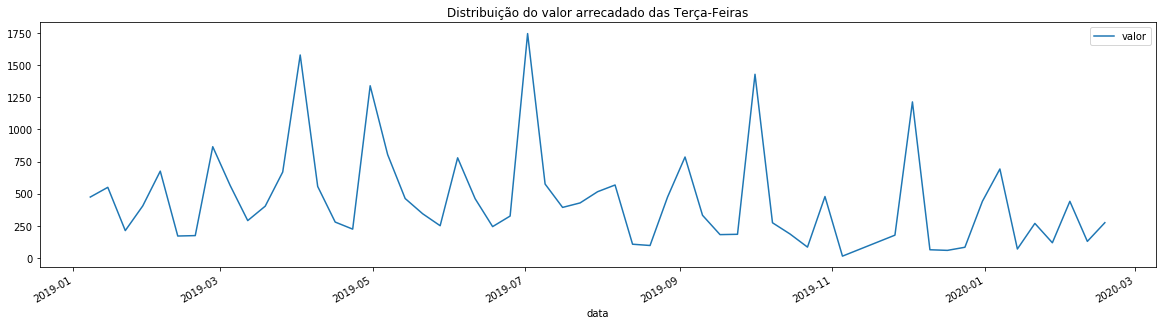

In [72]:
df_ter.plot(x='data', y='valor', title='Distribuição do valor arrecadado das Terça-Feiras',figsize=(20,5))

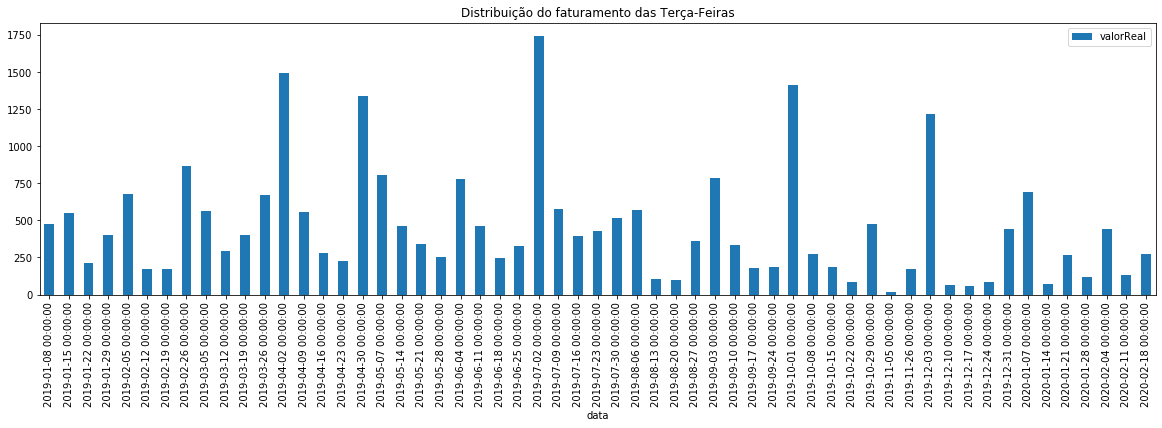

In [73]:
df_ter.plot(kind='bar', x='data', y='valorReal', title='Distribuição do faturamento das Terça-Feiras', figsize=(20,5))

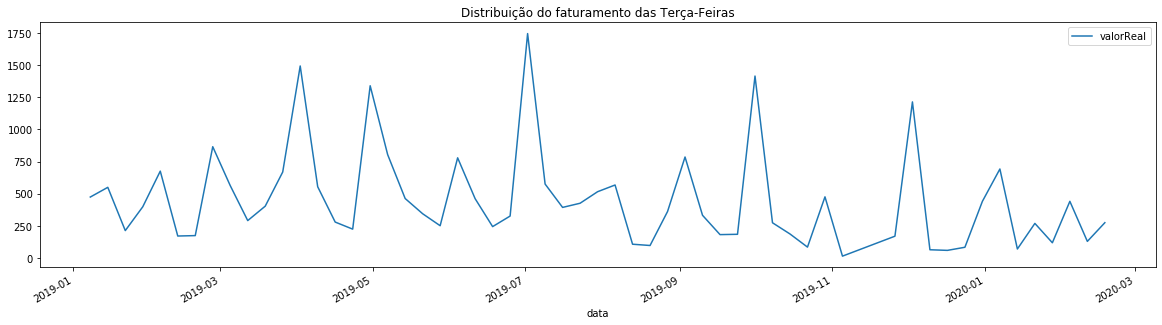

In [74]:
df_ter.plot(x='data', y='valorReal', title='Distribuição do faturamento das Terça-Feiras', figsize=(20,5))

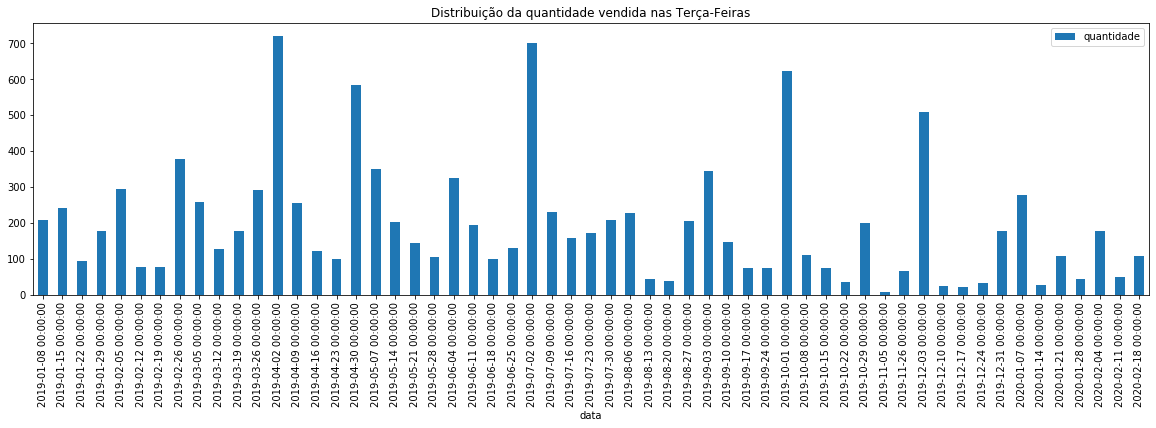

In [75]:
df_ter.plot(kind='bar', x='data', y='quantidade', title='Distribuição da quantidade vendida nas Terça-Feiras', figsize=(20,5))

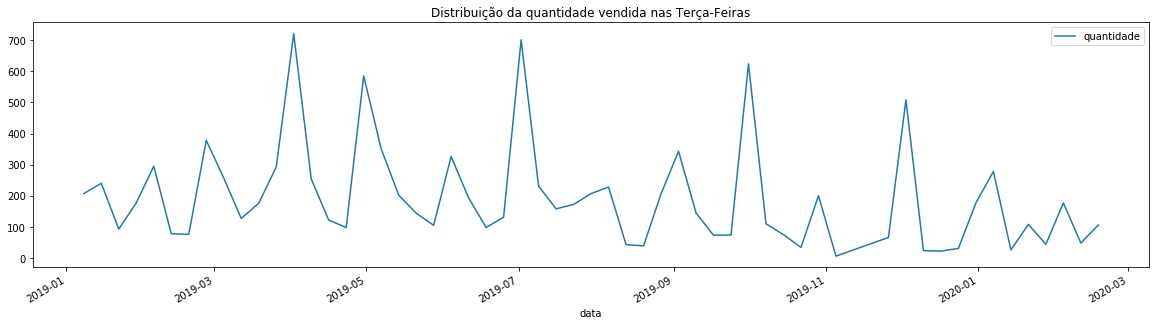

In [76]:
df_ter.plot(x='data', y='quantidade', title='Distribuição da quantidade vendida nas Terça-Feiras', figsize=(20,5))

In [77]:
plt.rcParams['figure.figsize'] = [12.0 , 8.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'

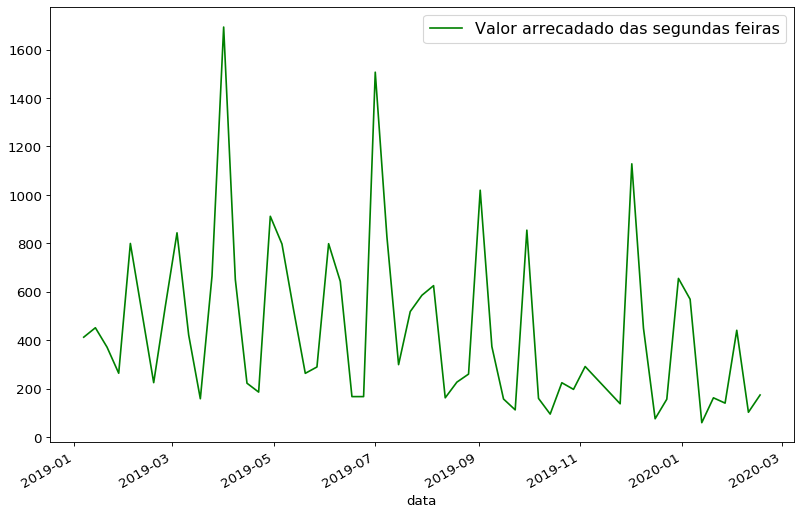

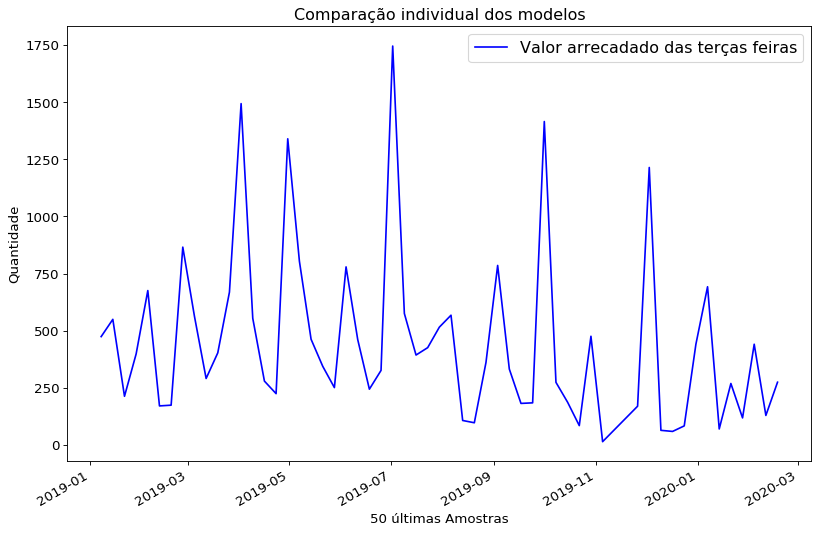

In [78]:
df_seg.plot(x='data', y='valorReal', color='green', label='Valor arrecadado das segundas feiras')
df_ter.plot(x='data', y='valorReal', color='blue', label='Valor arrecadado das terças feiras')

plt.ylabel('Quantidade')
plt.xlabel('50 últimas Amostras')
plt.legend(loc="best")
plt.title('Comparação individual dos modelos')
plt.show()